In [167]:
import datetime
import pandas as pd
from matplotlib import pyplot as plt
from src.datasource import YahooDataSource
from src.technicalfeatures import TechnicalFeatures
from src.utils import find_cointegrated_pairs,get_top_k_pairs,get_cointergrated_coeff

In [194]:
# Extract the Data from the Yahoo Data Source
start_date = datetime.datetime(2014, 3, 29)
end_date = datetime.datetime(2024, 3, 29)
tickers  =  ["GOOGL","GOOG"]
columns =   ["High","Close","Low","Volume"]
ds = YahooDataSource(start_date,end_date,tickers,columns)

In [195]:
# Get only Close column data
df_pair_search = ds.get_data_by_column_tickers(columns=["Close"],tickers=-1)

In [196]:
df_pair_search.head(n=5)
scores, pvalues, pairs = find_cointegrated_pairs(df_pair_search)

top_pairs = get_top_k_pairs(pairs,1)
print("Top pairs",top_pairs)

# Get first pair
tickers = ds.get_tickers(top_pairs[0][0])

Top pairs [(('GOOGL_Close', 'GOOG_Close'), 0.0004696405607190053)]


In [197]:
# Gather High, Low ,Close , Volume of selected stocks
columns = ["High","Close","Low","Volume"]
df_raw = ds.get_data_by_column_tickers(columns=columns,tickers=tickers)

In [198]:
df_raw

,GOOGL_Low,GOOGL_High,GOOGL_Volume,GOOGL_Close,GOOG_Low,GOOG_High,GOOG_Volume,GOOG_Close
0,27.849098,28.403402,77614308,27.890640,27.770258,28.272379,216593,27.772251
1,27.977978,28.465965,87152760,28.400652,27.859013,28.344681,158434,28.280355
2,28.128128,28.648649,83360556,28.405907,28.032537,30.158699,2942055,28.272379
3,28.300501,29.415001,80366000,28.575001,28.129271,29.283602,101983228,28.409002
4,27.224501,28.986000,107274000,27.262501,27.075665,28.809404,127386783,27.082645
...,...,...,...,...,...,...,...,...
2512,148.979996,151.580002,29175700,150.770004,150.089996,152.559998,19226300,151.770004
2513,147.820007,150.380005,19229300,150.070007,148.800003,151.455994,15114700,151.149994
2514,149.979996,152.259995,22149100,150.669998,151.029999,153.199997,19312700,151.699997
2515,148.899994,151.639999,22879200,150.869995,150.130005,152.690002,16622000,151.940002


In [135]:

# ts = TechnicalFeatures(df_raw)
# df = ts.money_flow_index(tickers = ["GOOGL","GOOG"])
# df = ts.acc_dist_index(tickers = ["GOOGL","GOOG"])
# df = ts.volume_price_trend(tickers = ["GOOGL","GOOG"])
# df = ts.average_true_range(tickers = ["GOOGL","GOOG"])
# df = ts.average_directional_movement_index(tickers = ["GOOGL","GOOG"])
# df = ts.log_return(columns=['GOOGL_Close','GOOG_Close'])
# df = ts.exponational_moving_average(columns=['GOOGL_Close','GOOG_Close'])
# df = ts.bollinger_mavg(columns=['GOOGL_Close','GOOG_Close'])
# df = ts.rsi(columns=['GOOGL_Close','GOOG_Close'])

In [199]:
first_series = "GOOG_Close"
second_series = "GOOGL_Close"

# Find ratio between co-integrated pairs
coeff = get_cointergrated_coeff(df_raw[first_series],df_raw[second_series])
print(coeff)

-1.003195729205077


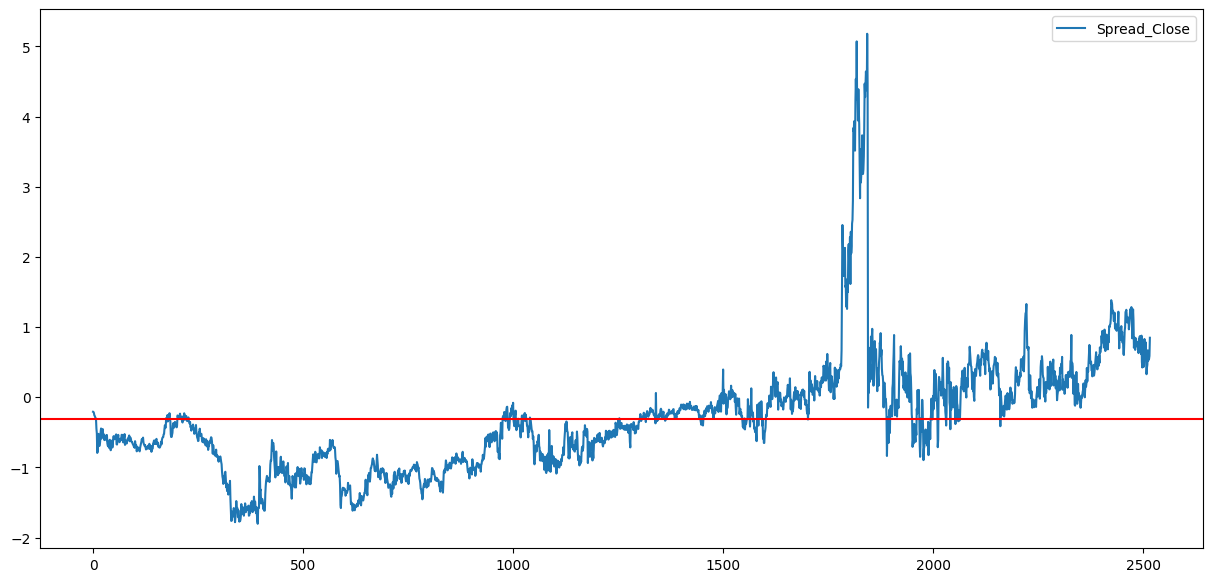

In [200]:
df_raw['Spread_Close'] = df_raw[first_series] + (df_raw[second_series] * coeff)
df_raw['Spread_Close'].plot(figsize=(15,7))
plt.axhline(df_raw['Spread_Close'].mean(),c='red')
plt.legend(['Spread_Close'])

In [19]:
df_raw['Spread_Close'].iloc[0:5]

0   -0.207520
1   -0.211057
2   -0.224305
3   -0.257316
4   -0.266979
Name: Spread_Close, dtype: float64

In [127]:
def custom_rolling_mean(window):
    return window.mean()

indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=3)
# Calculate custom rolling mean
rolling_mean = df_raw['Spread_Close'].shift(-1).rolling(window=indexer).apply(custom_rolling_mean)

In [128]:
rolling_mean

0      -0.230893
1      -0.249534
2      -0.269451
3      -0.282194
4      -0.297480
          ...   
2512    0.578923
2513    0.661345
2514         NaN
2515         NaN
2516         NaN
Name: Spread_Close, Length: 2517, dtype: float64

In [124]:
df_raw['Spread_Close']

0      -0.207520
1      -0.211057
2      -0.224305
3      -0.257316
4      -0.266979
          ...   
2512    0.518180
2513    0.600403
2514    0.548498
2515    0.587868
2516    0.847670
Name: Spread_Close, Length: 2517, dtype: float64

In [63]:
df_raw['Spread_Close'].shift(-3)

0      -0.257316
1      -0.266979
2      -0.284057
3      -0.295547
4      -0.312834
          ...   
2512    0.587868
2513    0.847670
2514         NaN
2515         NaN
2516         NaN
Name: Spread_Close, Length: 2517, dtype: float64

In [64]:
df_raw['Spread_Close']

0      -0.207520
1      -0.211057
2      -0.224305
3      -0.257316
4      -0.266979
          ...   
2512    0.518180
2513    0.600403
2514    0.548498
2515    0.587868
2516    0.847670
Name: Spread_Close, Length: 2517, dtype: float64

In [201]:

class PredictionModeliing:

    def __init__(self,data,column_name,test_size=0.40,forcast_period=2):
        self.data = data
        self.base_column = column_name
        self.forcast_period = forcast_period
        self.train_end_idex = len(data[column_name])*(1-test_size)
        self.add_actual_forecast_values()
        self.add_actual_forecast()
        self.add_actual_forecast_mean()
    
        #self.add_forecast_std()

    def add_actual_forecast(self):
        column_name = self.base_column + "_" + "Actual_value" + f"_fore_perod_{self.forcast_period}"
        self.data[column_name] = self.data[self.base_column].shift(-self.forcast_period)

    def add_actual_forecast_mean(self):
        column_name = self.base_column + "_" + "Actual_mean" + f"_fore_perod_{self.forcast_period}"
        def custom_rolling_mean(window):
            return window.mean()
        indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=self.forcast_period)
        self.data[column_name] = self.data[self.base_column].shift(-1).rolling(window=indexer).apply(custom_rolling_mean)

    def add_actual_forecast_values(self):
        column_name = self.base_column + "_" + "Actual" + f"_fore_perod_{self.forcast_period}"
        df_raw[column_name] = [df_raw[self.base_column].iloc[i+1:i+1+self.forcast_period].tolist() for i in range(len(df_raw) - self.forcast_period + 1)] + [[]] * (self.forcast_period - 1)

    # def add_forecast_std(self):
    #     column_name = self.base_column + "_" + "Actual_std" + f"_fore_perod_{self.forcast_period}"
    #     def custom_rolling_std(window):
    #         return (window).std(ddof=0)
    #     indexer = pd.api.indexers.FixedForwardWindowIndexer(window_size=self.forcast_period)
    #     self.data[column_name] = self.data[self.base_column].shift(-1).rolling(window=indexer).apply(custom_rolling_std)

   
    


In [202]:
pm = PredictionModeliing(df_raw,"Spread_Close",1)

In [203]:
pm.data

,GOOGL_Low,GOOGL_High,GOOGL_Volume,GOOGL_Close,GOOG_Low,GOOG_High,GOOG_Volume,GOOG_Close,Spread_Close,Spread_Close_Actual_fore_perod_2,Spread_Close_Actual_value_fore_perod_2,Spread_Close_Actual_mean_fore_perod_2
0,27.849098,28.403402,77614308,27.890640,27.770258,28.272379,216593,27.772251,-0.207520,"[-0.21105727109304695, -0.22430534130247182]",-0.224305,-0.217681
1,27.977978,28.465965,87152760,28.400652,27.859013,28.344681,158434,28.280355,-0.211057,"[-0.22430534130247182, -0.25731642333552784]",-0.257316,-0.240811
2,28.128128,28.648649,83360556,28.405907,28.032537,30.158699,2942055,28.272379,-0.224305,"[-0.25731642333552784, -0.2669789165712473]",-0.266979,-0.262148
3,28.300501,29.415001,80366000,28.575001,28.129271,29.283602,101983228,28.409002,-0.257316,"[-0.2669789165712473, -0.28405724382696107]",-0.284057,-0.275518
4,27.224501,28.986000,107274000,27.262501,27.075665,28.809404,127386783,27.082645,-0.266979,"[-0.28405724382696107, -0.2955473160344475]",-0.295547,-0.289802
...,...,...,...,...,...,...,...,...,...,...,...,...
2512,148.979996,151.580002,29175700,150.770004,150.089996,152.559998,19226300,151.770004,0.518180,"[0.6004034670534963, 0.548498265819461]",0.548498,0.574451
2513,147.820007,150.380005,19229300,150.070007,148.800003,151.455994,15114700,151.149994,0.600403,"[0.548498265819461, 0.5878676746529266]",0.587868,0.568183
2514,149.979996,152.259995,22149100,150.669998,151.029999,153.199997,19312700,151.699997,0.548498,"[0.5878676746529266, 0.8476704455386255]",0.847670,0.717769
2515,148.899994,151.639999,22879200,150.869995,150.130005,152.690002,16622000,151.940002,0.587868,[0.8476704455386255],NaN,NaN
